In [134]:
pwd

'/home/wsuser/work'

In [27]:
!pip install keras==2.2.4
!pip install tensorflow==2.7

     |████████████████████████████████| 312 kB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 20.7 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 489.7 MB 15 kB/s s eta 0:00:01
     |████████████████████████████████| 14.1 MB 84.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 78.2 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale =1./255 , shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale =1./255)

In [30]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='u18eaSo2ClwuzyRuP3khv_CBlmsmNZmOvY-mGJ8qT345',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-urnvv3i6pyzyrj'
object_key = 'dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr(streaming_body_2,"__iter__"): streaming_body_2.__iter__=types.MethodType(__iter__,streaming_body_2)


In [31]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
metadata_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-5952375e-ce71-461e-aa6a-8112a464b487',
    'IBM_API_KEY_ID': 'u18eaSo2ClwuzyRuP3khv_CBlmsmNZmOvY-mGJ8qT345',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'realtimecommunicationsystempowere-donotdelete-pr-urnvv3i6pyzyrj',
    'FILE': 'dataset.zip'
}


In [36]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [38]:
pwd

'/home/wsuser/work'

In [39]:
import os 
filenames = os.listdir('/home/wsuser/work/Dataset/training_set')

In [41]:
ls

Dataset/


In [42]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset/training_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode="grayscale")

Found 15750 images belonging to 9 classes.


In [43]:
x_test = test_datagen.flow_from_directory('/home/wsuser/work/Dataset/test_set',target_size=(64,64),batch_size=300,class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [44]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [45]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [46]:
import keras
import tensorflow
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [47]:
model = Sequential()

2022-11-18 04:24:47.334932: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-18 04:24:47.334967: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [48]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))

In [49]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
model.add(Flatten())

In [51]:
model.add(Dense(units=512,activation='relu'))

In [52]:
model.add(Dense(units=9,activation='softmax'))

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.fit_generator(x_train,steps_per_epoch=24,epochs=10,validation_data=x_test,validation_steps=40)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - 33s 1s/step - loss: 0.8177 - accuracy: 0.7361 - val_loss: 0.3358 - val_accuracy: 0.9147
Epoch 2/10
24/24 [==============================] - 32s 1s/step - loss: 0.1935 - accuracy: 0.9474 - val_loss: 0.2531 - val_accuracy: 0.9554
Epoch 3/10
24/24 [==============================] - 32s 1s/step - loss: 0.0960 - accuracy: 0.9726 - val_loss: 0.2314 - val_accuracy: 0.9640
Epoch 4/10
24/24 [==============================] - 33s 1s/step - loss: 0.0642 - accuracy: 0.9847 - val_loss: 0.2304 - val_accuracy: 0.9705
Epoch 5/10
24/24 [==============================] - 31s 1s/step - loss: 0.0406 - accuracy: 0.9912 - val_loss: 0.2890 - val_accuracy: 0.9708
Epoch 6/10
24/24 [==============================] - 31s 1s/step - loss: 0.0295 - accuracy: 0.9936 - val_loss: 0.2889 - val_accuracy: 0.9689
Epoch 7/10
24/24 [==============================] - 32s 1s/step - loss: 0.0217 - accuracy: 0.9953 - val_loss: 0.3092 - val_accuracy: 0.9742
Epoch 8/10
24/24 [==

In [55]:
model.save('aslpng1.h5')

In [56]:
ls

aslpng1.h5  Dataset/


In [71]:
!tar -zcvf model.tgz aslpng1.h5

aslpng1.h5


In [72]:
ls -1

aslpng1.h5
Dataset/
image.Classification.model_new.tgz
model.tgz


In [59]:
!pip install watson_machine_learning_client --upgrade

In [60]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    #"apikey": "sqLVTXSP3nnAKfzJ1rKRKCpNzS_XZ8_HXa9FRwV7BvOP"
    "apikey":  "bfMnwgw13qwE2GAODimxSzGFaGJ9GYeSrDSZaixN8CaF"
}
client = APIClient(url_credentials)

In [61]:
client = APIClient(url_credentials)
client

In [62]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [63]:
space_uid = guid_from_space_name(client, 'Real-Time Communication System Through AI for Specially Abled')
print("space UID = " + space_uid)

space UID = 4eb910b3-4c31-4a39-bc9c-cf36f1dc539f


In [64]:
client.set.default_space(space_uid)

'SUCCESS'

In [65]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [66]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [67]:
pwd

'/home/wsuser/work'

In [73]:
ls

aslpng1.h5  Dataset/  image.Classification.model_new.tgz  model.tgz


In [74]:
model_details = client.repository.store_model(model='model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [75]:
model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [76]:
model_id

'2f3ecede-e88e-44bc-85e3-83870c5a0802'

In [77]:
client.repository.download(model_id, 'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [78]:
from keras.models import load_model
from keras.preprocessing import image

In [82]:
ls

aslpng1.h5  image.Classification.model_new.tgz  my_model.tar.gz
Dataset/    model.tgz


In [83]:
model = load_model("aslpng1.h5")

In [86]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='u18eaSo2ClwuzyRuP3khv_CBlmsmNZmOvY-mGJ8qT345',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-urnvv3i6pyzyrj'
object_key = '5.png'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr(streaming_body_3,"__iter__"): streaming_body_3.__iter__=types.MethodType(__iter__,streaming_body_3)



In [89]:
ls

aslpng1.h5  image.Classification.model_new.tgz  my_model.tar.gz
Dataset/    model.tgz


In [90]:
pwd

'/home/wsuser/work'

In [91]:
cd /home/wsuser/work/Dataset/test_set/

/home/wsuser/work/Dataset/test_set


In [92]:
ls

A/  B/  C/  D/  E/  F/  G/  H/  I/


In [93]:
cd /home/wsuser/work/Dataset/test_set/B/

/home/wsuser/work/Dataset/test_set/B


In [94]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [96]:
img = image.load_img(r"/home/wsuser/work/Dataset/test_set/B/5.png")

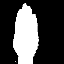

In [97]:
img

In [98]:
x = image.img_to_array(img)

In [99]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [101]:
x = np.expand_dims(x,axis=1)

In [102]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       ...,


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)